In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
lam = np.linspace(400, 700, 31)
dlam = 10
S = np.ones_like(lam, dtype=float)

R = np.array([
    0.10,  # 400 nm
    0.10,  # 410 nm
    0.10,  # 420 nm
    0.10,  # 430 nm
    0.10,  # 440 nm
    0.10,  # 450 nm
    0.10,  # 460 nm
    0.10,  # 470 nm
    0.10,  # 480 nm
    0.175, # 490 nm
    0.25,  # 500 nm
    0.325, # 510 nm
    0.40,  # 520 nm
    0.475, # 530 nm
    0.55,  # 540 nm
    0.625, # 550 nm
    0.70,  # 560 nm
    0.705, # 570 nm
    0.710, # 580 nm
    0.715, # 590 nm
    0.720, # 600 nm
    0.725, # 610 nm
    0.730, # 620 nm
    0.735, # 630 nm
    0.740, # 640 nm
    0.745, # 650 nm
    0.750, # 660 nm
    0.755, # 670 nm
    0.760, # 680 nm
    0.765, # 690 nm
    0.770   # 700 nm
])


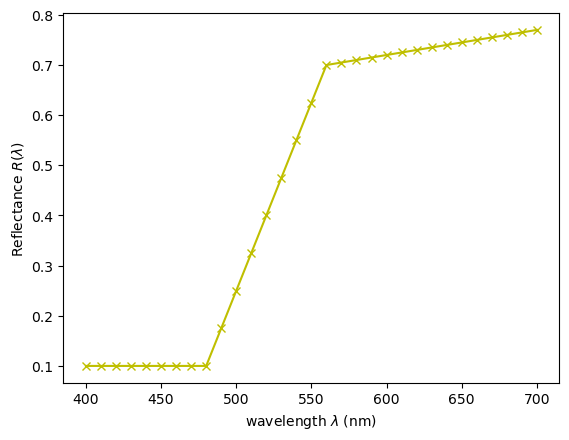

In [41]:
plt.plot(lam, R, 'yx-', label = 'Sample Ceramic Yellow Glaze Reflectance')
plt.xlabel('wavelength $\lambda$ (nm)')
plt.ylabel('Reflectance $R(\lambda)$');

In [42]:
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Rough shapes:
# xbar peaks in the red, ybar in the green, zbar in the blue.
xbar = 1.2 * gaussian(lam, 600, 40) + 0.05 * gaussian(lam, 450, 30)
ybar = 1.0 * gaussian(lam, 560, 35)
zbar = 1.5 * gaussian(lam, 450, 25)

# Normalize CMFs so that a perfect diffuser (R=1) has Y = 100
k_norm = 100.0 / np.sum(S * ybar * dlam)
xbar *= k_norm
ybar *= k_norm
zbar *= k_norm

In [43]:
# ------------------------------------------------------------
# XYZ and LAB computation
# ------------------------------------------------------------

def compute_xyz(R, wl, S, xbar, ybar, zbar):
    """Discrete colorimetric integration for XYZ."""
    d_lambda = wl[1] - wl[0]
    X = np.sum(R * S * xbar * d_lambda)
    Y = np.sum(R * S * ybar * d_lambda)
    Z = np.sum(R * S * zbar * d_lambda)
    return X, Y, Z

def f_lab(t):
    """Helper function for CIE 1976 Lab."""
    delta = (6/29)**3
    if np.isscalar(t):
        t = np.array([t])
    out = np.empty_like(t, dtype=float)
    big = t > delta
    out[big] = t[big] ** (1/3)
    out[~big] = (t[~big] / (3 * (6/29)**2)) + 4/29
    return out if len(out) > 1 else out[0]

def xyz_to_lab(X, Y, Z, Xn, Yn, Zn):
    """CIE 1976 L*a*b* from XYZ and reference white."""
    fx = f_lab(X / Xn)
    fy = f_lab(Y / Yn)
    fz = f_lab(Z / Zn)
    L = 116 * fy - 16
    a = 500 * (fx - fy)
    b = 200 * (fy - fz)
    return L, a, b

10 nm sampling:
X = 95.647, Y = 60.388, Z = 11.646
L* = 82.05, a* = 17.01, b* = 73.17


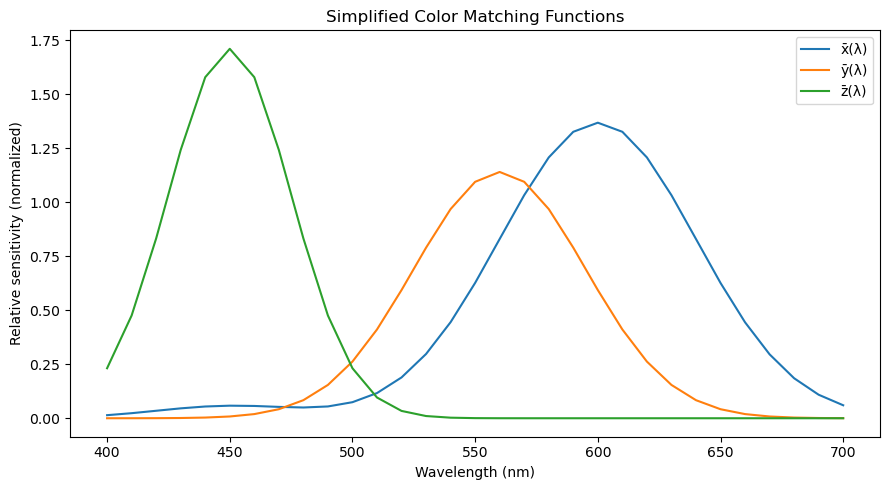

In [46]:
# Reference white (perfect diffuser R=1 under same SPD/observer)
Xn, Yn, Zn = compute_xyz(np.ones_like(R), lam, S,
                                  xbar, ybar, zbar)

# Glaze XYZ and LAB at 10 nm sampling
X, Y, Z = compute_xyz(R, lam, S,
                               xbar, ybar, zbar)
L, a, b = xyz_to_lab(X, Y, Z,
                              Xn, Yn, Zn)

print("10 nm sampling:")
print(f"X = {X:.3f}, Y = {Y:.3f}, Z = {Z:.3f}")
print(f"L* = {L:.2f}, a* = {a:.2f}, b* = {b:.2f}")


# ------------------------------------------------------------
# Plots
# ------------------------------------------------------------

# Simplified CMFs 
plt.figure(figsize=(9, 5))
plt.plot(lam, xbar, label="x̄(λ)")
plt.plot(lam, ybar, label="ȳ(λ)")
plt.plot(lam, zbar, label="z̄(λ)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Relative sensitivity (normalized)")
plt.title("Simplified Color Matching Functions")
plt.legend()
plt.tight_layout()

plt.show()